<a href="https://colab.research.google.com/github/xbadiam/Marketing_Campaign/blob/main/notebooks/MarketingCampaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Campaña de marketing
Aumentar las ganancias de una campaña de marketing

### Contexto

Un modelo de respuesta puede aumentar significativamente la eficiencia de una campaña de marketing, ya sea incrementando las respuestas o reduciendo los gastos. El objetivo es predecir quién responderá a una oferta de un producto o servicio.

In [57]:
!rm -rf /content/Marketing_Campaign

! git clone https://github.com/xbadiam/Marketing_Campaign.git

Cloning into 'Marketing_Campaign'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 96 (delta 37), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (96/96), 2.45 MiB | 12.16 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [58]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import plotly.express as px

# Modelado
# ==============================================================================
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA


## 3. Cargar datos

In [59]:
data = pd.read_csv('/content/Marketing_Campaign/outputs/output.csv')
data.head(10)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spending,Has_child,Living_With,Children
0,Graduate,Single,58138.0,Without_Kid,Without_Teen,2012-09-04,58,635,88,546,...,0,0,0,0,1,68,1617,0,Single,0
1,Graduate,Single,46344.0,With_Kid,With_Teen,2014-03-08,38,11,1,6,...,0,0,0,0,0,71,27,1,Single,2
2,Graduate,Together,71613.0,Without_Kid,Without_Teen,2013-08-21,26,426,49,127,...,0,0,0,0,0,60,776,0,Partner,0
3,Graduate,Together,26646.0,With_Kid,Without_Teen,2014-02-10,26,11,4,20,...,0,0,0,0,0,41,53,1,Partner,1
4,Postgraduate,Married,58293.0,With_Kid,Without_Teen,2014-01-19,94,173,43,118,...,0,0,0,0,0,44,422,1,Partner,1
5,Postgraduate,Together,62513.0,Without_Kid,With_Teen,2013-09-09,16,520,42,98,...,0,0,0,0,0,58,716,1,Partner,1
6,Graduate,Divorced,55635.0,Without_Kid,With_Teen,2012-11-13,34,235,65,164,...,0,0,0,0,0,54,590,1,Single,1
7,Postgraduate,Married,33454.0,With_Kid,Without_Teen,2013-05-08,32,76,10,56,...,0,0,0,0,0,40,169,1,Partner,1
8,Postgraduate,Together,30351.0,With_Kid,Without_Teen,2013-06-06,19,14,0,24,...,0,0,0,0,1,51,46,1,Partner,1
9,Postgraduate,Together,5648.0,With_Kid,With_Teen,2014-03-13,68,28,0,6,...,0,0,0,0,0,75,49,1,Partner,2


In [60]:
print("Número de características:", len(data.columns))
print("Longitud del conjunto de datos:", len(data))

Número de características: 30
Longitud del conjunto de datos: 2234


In [61]:
# Visualizamos los tipos de cada uno de los atributos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2234 entries, 0 to 2233
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2234 non-null   object 
 1   Marital_Status       2234 non-null   object 
 2   Income               2234 non-null   float64
 3   Kidhome              2234 non-null   object 
 4   Teenhome             2234 non-null   object 
 5   Dt_Customer          2234 non-null   object 
 6   Recency              2234 non-null   int64  
 7   MntWines             2234 non-null   int64  
 8   MntFruits            2234 non-null   int64  
 9   MntMeatProducts      2234 non-null   int64  
 10  MntFishProducts      2234 non-null   int64  
 11  MntSweetProducts     2234 non-null   int64  
 12  MntGoldProds         2234 non-null   int64  
 13  NumDealsPurchases    2234 non-null   int64  
 14  NumWebPurchases      2234 non-null   int64  
 15  NumCatalogPurchases  2234 non-null   i

## 4. Preprocesado

In [62]:
# Selección de las columnas numéricas y categóricas
# ==============================================================================

numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

In [63]:
# Preprocesamiento

preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)
])

## 5. Reducción de dimensionalidad (PCA)

In [64]:
# Pipeline PCA
pca_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('pca', PCA(n_components=0.95, svd_solver='full', random_state=42))
])

pca_pipeline.fit_transform(data)

# Se extrae el modelo entrenado del pipeline
pca_model = pca_pipeline.named_steps['pca']

Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. Esta información está almacenada en los atributos explained_variance_ y explained_variance_ratio_ del modelo.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.2924 0.083  0.0684 0.0506 0.0388 0.0366 0.0357 0.0335 0.0301 0.0283
 0.0271 0.0243 0.022  0.0215 0.0207 0.0174 0.0164 0.0158 0.0142 0.0133
 0.0123 0.0108 0.0106 0.0088 0.0078 0.0066 0.0058]


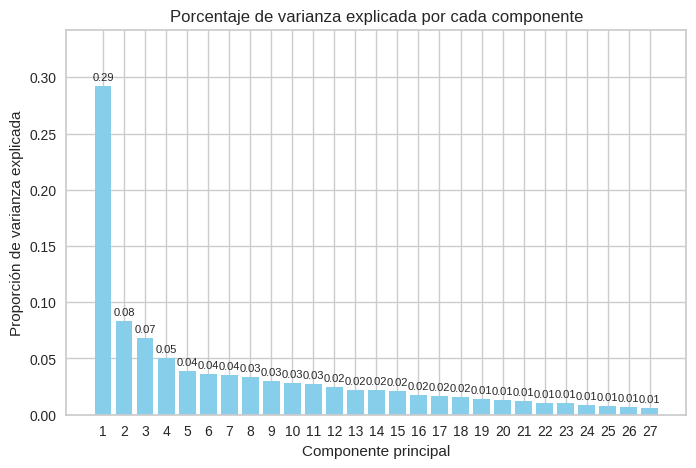

In [65]:
# Gráfico de los componentes
# ==============================================================================

print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')

print(np.round(pca_model.explained_variance_ratio_, 4))  # 4 decimales para claridad

# Obtenemos el objeto PCA del pipeline
pca_model = pca_pipeline.named_steps['pca']

# Gráfico de la varianza explicada
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(
    x=np.arange(pca_model.n_components_) + 1,
    height=pca_model.explained_variance_ratio_,
    color='skyblue'
)

# Etiquetas de porcentaje sobre las barras
for i, v in enumerate(pca_model.explained_variance_ratio_):
    ax.text(i + 1, v + 0.005, f"{v:.2f}", ha='center', fontsize=8)

ax.set_xticks(np.arange(pca_model.n_components_) + 1)
ax.set_ylim(0, max(pca_model.explained_variance_ratio_) + 0.05)
ax.set_title('Porcentaje de varianza explicada por cada componente', fontsize=12)
ax.set_xlabel('Componente principal')
ax.set_ylabel('Proporción de varianza explicada')
plt.show()


En este caso, la primera componente explica el 29% de la varianza observada en los datos y la segunda el 8%. Las dos últimas componentes no superan por separado el 1% de varianza explicada.

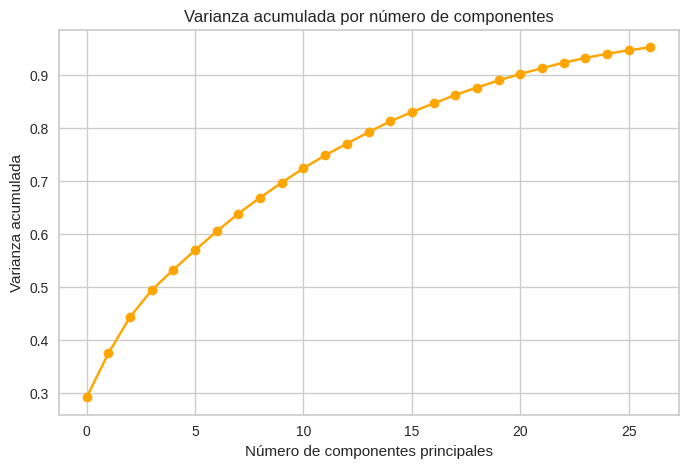

In [66]:
# Gráfico acumulativo
# ==============================================================================

plt.figure(figsize=(8, 5))
plt.plot(
    np.cumsum(pca_model.explained_variance_ratio_), marker='o', color='orange'
)
plt.title('Varianza acumulada por número de componentes')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.show()

Si se empleasen 27 componentes se conseguiría explicar el 95% de la varianza observada.

In [67]:
# Gráfico de los componentes
# ==============================================================================

# Get the PCA estimator from the pipeline
pca_estimator = pca_pipeline.named_steps['pca']

# Calcular la varianza explicada acumulada
varianza_acumulada = np.cumsum(pca_estimator.explained_variance_ratio_)

In [68]:
# Imprimir resultados
for i, var in enumerate(varianza_acumulada):
    print(f"Componentes: {i+1}, Varianza explicada acumulada: {var:.2f}")

Componentes: 1, Varianza explicada acumulada: 0.29
Componentes: 2, Varianza explicada acumulada: 0.38
Componentes: 3, Varianza explicada acumulada: 0.44
Componentes: 4, Varianza explicada acumulada: 0.49
Componentes: 5, Varianza explicada acumulada: 0.53
Componentes: 6, Varianza explicada acumulada: 0.57
Componentes: 7, Varianza explicada acumulada: 0.61
Componentes: 8, Varianza explicada acumulada: 0.64
Componentes: 9, Varianza explicada acumulada: 0.67
Componentes: 10, Varianza explicada acumulada: 0.70
Componentes: 11, Varianza explicada acumulada: 0.72
Componentes: 12, Varianza explicada acumulada: 0.75
Componentes: 13, Varianza explicada acumulada: 0.77
Componentes: 14, Varianza explicada acumulada: 0.79
Componentes: 15, Varianza explicada acumulada: 0.81
Componentes: 16, Varianza explicada acumulada: 0.83
Componentes: 17, Varianza explicada acumulada: 0.85
Componentes: 18, Varianza explicada acumulada: 0.86
Componentes: 19, Varianza explicada acumulada: 0.88
Componentes: 20, Vari

In [69]:
# Get the transformed data from the fitted pipeline
pca_transformed_data = pca_pipeline.transform(data)

# Obtenemos el número de componentes del objeto estimador PCA
num_components = pca_model.n_components_

# Create the DataFrame using the transformed data and correct number of components
PCA_dataset = pd.DataFrame(
    pca_transformed_data,
    columns=[f'PC{i+1}' for i in range(num_components)],
    index=data.index)

PCA_dataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
0,4.501882,-0.094988,-0.399081,2.056418,-0.256917,-0.221209,0.015546,-1.046802,-1.262022,2.124300,...,-1.439778,-0.108954,0.482702,0.002421,-0.587348,0.531140,0.554337,-0.289004,0.016047,-0.445268
1,-2.776196,0.128743,-0.157356,-0.791478,-1.296969,0.398762,-0.388052,0.881388,0.288314,0.915418,...,-0.380063,-0.388299,0.277346,-0.024403,-0.105992,-0.324650,0.116184,-0.306694,0.080446,-0.271599
2,2.143981,-0.734468,-1.100111,-0.283863,-0.549582,-0.903958,0.631328,-1.273107,0.394224,-0.092504,...,0.318452,0.241567,1.318295,0.996963,0.768314,-0.319237,0.016871,-0.554958,0.544586,-0.202886
3,-2.661001,-1.235059,0.130223,0.347337,0.473181,-0.709644,0.736625,0.472579,0.447377,-0.560747,...,-0.070799,-0.030699,0.536811,0.053357,0.966135,0.094521,0.345388,-0.126326,-0.332050,0.180783
4,-0.573153,0.416378,-0.796664,0.141727,1.820311,0.187651,-0.128987,0.591444,-0.563548,-0.696121,...,0.653563,0.247474,-0.498892,0.894659,-0.496684,-0.306686,0.563770,-0.286592,0.059799,0.662936


In [70]:
# Encontrar el número óptimo de componentes
n_componentes = np.argmax(varianza_acumulada >= 0.95) + 1

El resultado muestra que, para este conjunto de datos, son necesarios 27 componentes de los 30 totales para conservar el 95% de la varianza explicada.

## 6. Modelado: Clustering con Kmeans

En este apartado probamos el algorismo k-means sobre el dataset obtenido anteriorment, ajustando los parámetros adecuados, y analizando sus resultados.

Se utilizará el metodo Elbow para definir el número de clusters

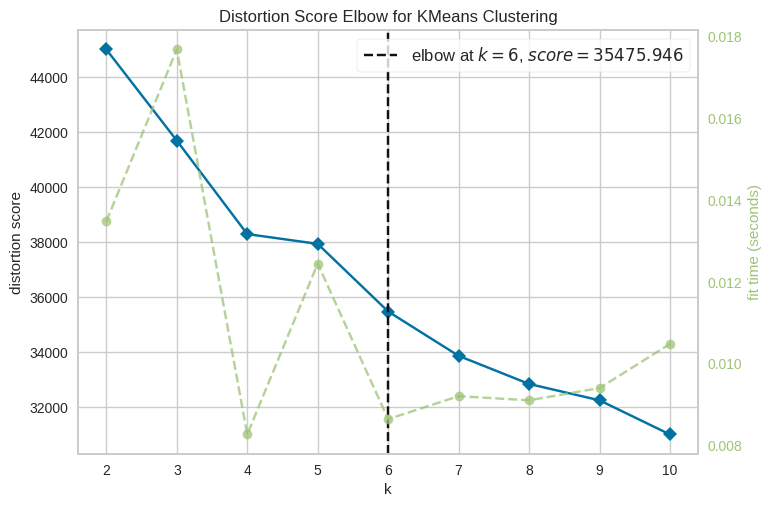

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(PCA_dataset)
visualizer.show()

La grafica muestra que el numero óptimo de cluesters son 6, por lo que se procedera a entrenar un modelo Kmeans el cual permita clasificar los datos.

In [72]:
kmeans = KMeans(n_clusters=6, random_state = 42)

Kmeans_clusters = kmeans.fit_predict(PCA_dataset)
PCA_dataset['Clusters'] = Kmeans_clusters

# Se agregaran los cluster sl dataset original
data['Clusters'] = Kmeans_clusters

In [78]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spending,Has_child,Living_With,Children,Clusters
0,Graduate,Single,58138.0,Without_Kid,Without_Teen,2012-09-04,58,635,88,546,...,0,0,0,1,68,1617,0,Single,0,5
1,Graduate,Single,46344.0,With_Kid,With_Teen,2014-03-08,38,11,1,6,...,0,0,0,0,71,27,1,Single,2,2
2,Graduate,Together,71613.0,Without_Kid,Without_Teen,2013-08-21,26,426,49,127,...,0,0,0,0,60,776,0,Partner,0,5
3,Graduate,Together,26646.0,With_Kid,Without_Teen,2014-02-10,26,11,4,20,...,0,0,0,0,41,53,1,Partner,1,2
4,Postgraduate,Married,58293.0,With_Kid,Without_Teen,2014-01-19,94,173,43,118,...,0,0,0,0,44,422,1,Partner,1,4
